<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

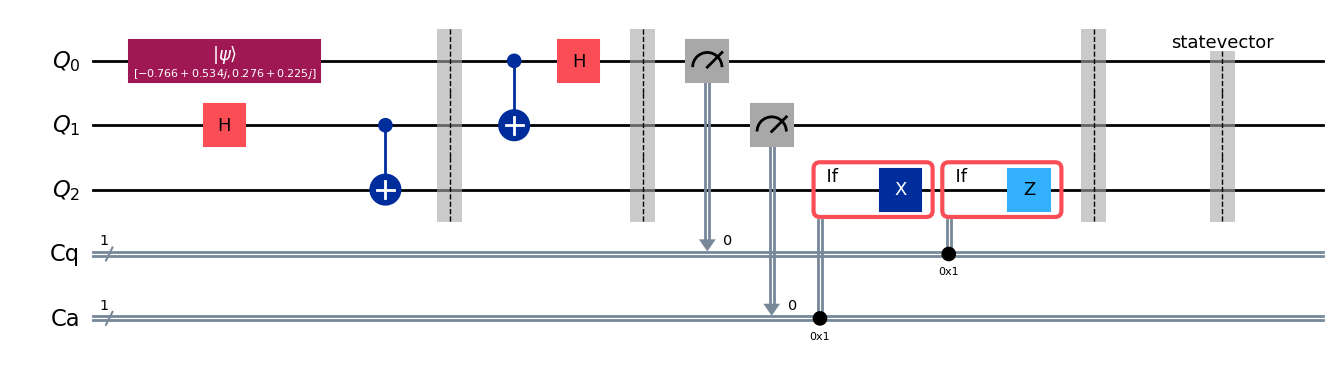

In [50]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector,Operator,random_statevector,partial_trace,state_fidelity
from IPython.display import display,Latex
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import ipywidgets as w

# Initialize Circuit Structure (Random Q, AB is ϕ+)
sim = AerSimulator(method='statevector')
clx = ClassicalRegister(1,"Cq")
cly = ClassicalRegister(1,"Ca")
qr = QuantumRegister(3,"Q")
qc = QuantumCircuit(qr,clx,cly)
Q = random_statevector(2)
qc.initialize(Q,0)
qc.h(1)
qc.cx(1,2)
qc.barrier()

# Implement Teleportation Algorithm

qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.measure(0,clx)
qc.measure(1,cly)
with qc.if_test((cly, 1)):
    qc.x(2)
with qc.if_test((clx, 1)):
    qc.z(2)
qc.barrier()

# Add Code to show Simulation to Display Teleported Qubit Q0 -> Q2

lef = w.Output()
rig = w.Output()
qc.save_statevector()
job = sim.run(qc)
result = job.result()
final_state = result.get_statevector()
tstate = partial_trace(final_state, [0, 1])
with lef:
    display(Latex("Original State (Input):"))
    display(Q.draw("latex"))
    display(plot_bloch_multivector(Q))
with rig:
    display(Latex("Teleported State (Qubit 2):"))
    display(tstate.to_statevector().draw("latex"))
    display(plot_bloch_multivector(tstate))
display(w.HBox([lef,rig]))
display(Latex(f"Teleportation Fidelity Rate : {state_fidelity(Q,tstate.to_statevector()):.4f}"))
display(Latex("Quantum Teleportation Circuit - "))
display(qc.draw(output="mpl"))


